# SURNAME: Benvenuto NAME: Giulia
## Autoencoder

## Import main libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.models import Model


Autoencoders are a data compression algorithms made up of a compression and decompression functions.
Two interesting practical applications of autoencoders are data denoising, and dimensionality reduction for data visualization. 

 The lab is organized as following:

  1.1 Dataset loading;

  1.2 Pre-processing (Dataset normalization, splitting and label pre-processing; 

  1.3 Deep Autoencoder implementation;

  1.4 Autoencoder training;

  1.5 Autoencoder testing.


  Similarly with a Convolutional Autoencoder.

  You will visualize the latent representation and use such method for image denoising with synthetic noise.




 

## Load data fashion_mnist dataset
Load the data you want experiment with (e.g. fashion and mnist). Experiment with different dataset, how the architectures should be changed? Do you notice any difference in the results (e.g. in terms of the loss function)?

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Normalize and add one channel.
One common practice in training a Neural Network is to normalize the images by dividing each pixel value by the maximum value that we can have.<br> The purpose of this is to obtain a mean close to 0.<br>
Normalizing the data generally speeds up learning and leads to faster convergence

In [3]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """
    # Fill here 
    array = array.astype("float32") / 255.0
    
    # add 1 channel
    # Fill here 
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

# Normalize and reshape the data
x_train = preprocess(x_train)
x_test = preprocess(x_test)

## Visualize data

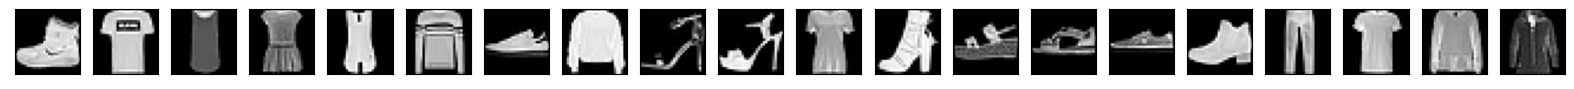

In [4]:
def plot_imgs(imgs, n= 20):
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # Display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plot_imgs(x_train)

## Define Deep Autoencoder with Dense layers

Models in Keras are defined as a sequence of layers. The things to choose when defining the architecture are many:
 - number of layers
 - type of layers
 - size of layers
 - type of non-linearity (activation functions)
 - whether or not to add regularization
 
Here we will use only fully-connected (dense) layers, so the type of layer is fixed. Fully connected layers are defined using the [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) class, which takes as parameters the number of neurons (which is the **dimension of the output**).

The following image is sketch of the general architecure:

![Deep Autoencoder](https://www.compthree.com/images/blog/ae/ae.png)


Define a class extending [Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model), then we define the [sequence](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) of layers for both encoder and decoder. Note than the Encoder and Decoder  should be as symmetric as possible. 

In [43]:
# Initial solution, we can change it to get a better result

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   


    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      # layers.Dense(784, activation='sigmoid'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
    ])

    
    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

## Compile model

Define the autoencoder of fully connected layers.
After having created a model you need to **compile** it. During the compilation phase you must specify some parameters related to how the model will be optimized:
 - The `optimizer`. For the following exercise you should use [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD), initialized with some learning rate.
 - The `loss` function. For the reconstruction you can use the [mean squared error](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError) loss.
 - A list of `metrics`: common error functions which you want keras to report at each training epoch.



## Try to change latent_dim
The **latent_dim** parameter determines the size of the bottleneck layer in the autoencoder. 
- Increasing the value of latent_dim will result in a larger bottleneck layer, allowing the autoencoder to learn more complex representations of the input data. However, this comes at the cost of requiring more parameters to be learned by the model, which can make training slower and potentially lead to overfitting if the dataset is small. This is due also to the fact that we are considering a dense fully connected network and so as we increase the number of latent_dim the number of parameters to be learned will be increase too. 

- Decreasing the value of latent_dim will result in a smaller bottleneck layer, which may limit the complexity of the representations that the model can learn. However, this can lead to faster training and better generalization, especially if the dataset is small.

In general I think that the choice of latent_dim should be based on the complexity of the input data and the size of the dataset. A larger latent_dim may be necessary for more complex data, but may not be necessary for simpler datasets. It is also important to consider the computational resources available for training the model, as a larger latent_dim will require more computational power and may take longer to train.

### latent_dim = 10

In [44]:
# Create the model 
latent_dim = 10
autoencoder = Autoencoder(latent_dim)

# Set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(),  metrics=['mse', 'mae'])

In [45]:
# Try to change the number of epochs 
# See when there is overfitting 
# epochs = 5
epochs = 10
history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test))


autoencoder.summary()

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0262 - mse: 0.0262 - mae: 0.0943 - val_loss: 0.0187 - val_mse: 0.0187 - val_mae: 0.0767
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - mse: 0.0176 - mae: 0.0734 - val_loss: 0.0169 - val_mse: 0.0169 - val_mae: 0.0715
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0163 - mse: 0.0163 - mae: 0.0695 - val_loss: 0.0159 - val_mse: 0.0159 - val_mae: 0.0685
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0156 - mse: 0.0156 - mae: 0.0675 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0674
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0152 - mse: 0.0152 - mae: 0.0661 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0664
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0149 - mse: 0.0149 - mae: 0.0652 - val_loss: 0.0149 - val_mse: 0.0149 - val_mae: 0.0650
Epoc

Plot the loss function for each epoch for both validation and traning data. See [History](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History).

In [5]:
def plot_loss(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.plot(loss, marker="o", c="red", label='Training loss')
  plt.plot(val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend()

  plt.show()

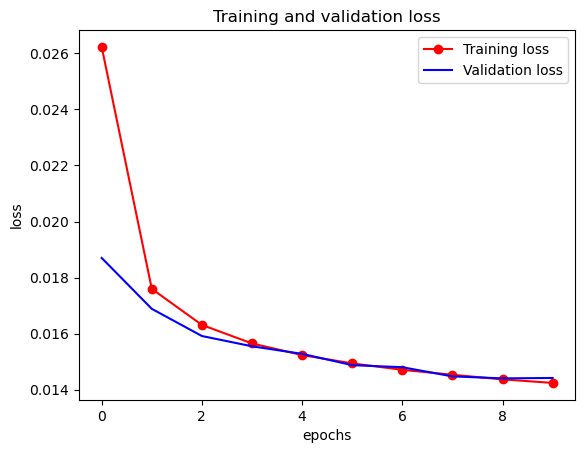

In [49]:
plot_loss(history)

Test the learnt model on the test set.

In [50]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [6]:
def plot_examples(x_test, decoded_imgs, n = 10):
  
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

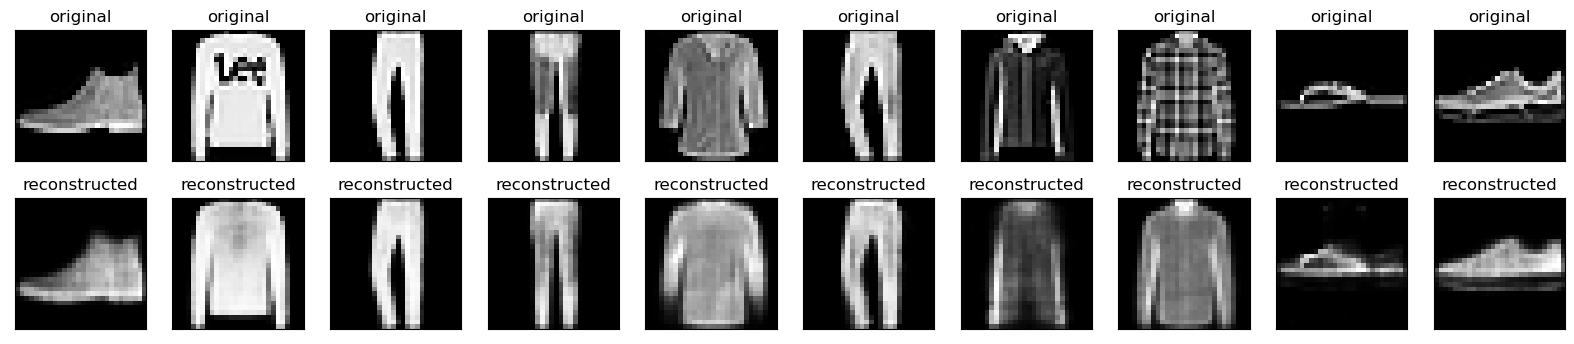

In [52]:
plot_examples(x_test,decoded_imgs)

Visualize the latent representation. If it is 2-dimensional plot as it is, otherwise apply PCA dimensionality reduction. Try to visualize the points with a different color for each class, what do you observe?

In [7]:
def plot_pca_latent_space(encoded_imgs, labels):

  pca = PCA(n_components=2)
  data_reduced = pca.fit_transform(encoded_imgs)

  x, y = data_reduced[..., 0], data_reduced[..., 1]

  plt.figure(figsize=(8, 6), dpi=80)
  plt.scatter(x, y, c=labels, cmap='viridis')
  plt.title("Representation wrt labels")
  plt.colorbar()
  plt.show()

def plot_latent_space(encoded_imgs, labels):

  assert encoded_imgs.shape[-1] ==2

  x, y = encoded_imgs[..., 0], encoded_imgs[..., 1]

  plt.figure(figsize=(8, 6), dpi=80)
  plt.scatter(x, y, c=labels, cmap='viridis')
  plt.title("Representation wrt labels")
  plt.colorbar()
  plt.show()

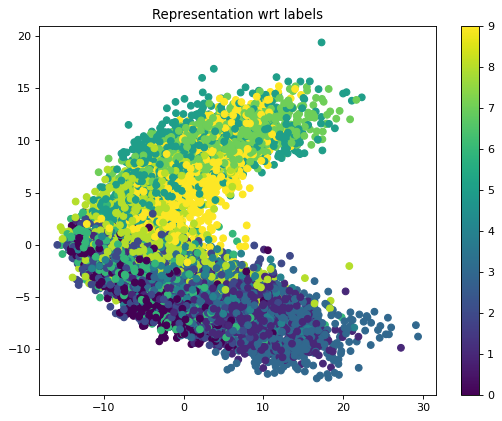

In [54]:
if latent_dim==2:
  plot_latent_space(encoded_imgs, y_test)
else:
  plot_pca_latent_space(encoded_imgs, y_test)

Here we will scan the latent plane, sampling latent points at regular intervals, and generating the corresponding image for each of these points. This gives us a visualization of the latent manifold that "generates" the data.

In [8]:
def plot_manifold(decoder, n=15):
  # Display a 2D manifold of the digits
  n = 15  # figure with 15x15 digits
  img_size = 28
  figure = np.zeros((img_size * n, img_size * n))
  # We will sample n points within [-15, 15] standard deviations
  grid_x = np.linspace(-15, 15, n)
  grid_y = np.linspace(-15, 15, n)

  for i, yi in enumerate(grid_x):
      for j, xi in enumerate(grid_y):
          z_sample = np.array([[xi, yi]])
          print(z_sample.shape)
          x_decoded = decoder.predict(z_sample)
          digit = x_decoded[0].reshape(img_size, img_size)
          figure[i * img_size: (i + 1) * img_size,
               j * img_size: (j + 1) * img_size] = digit

  plt.figure(figsize=(10, 10))
  plt.imshow(figure)
  plt.show()

In [56]:
if latent_dim==2:
  plot_manifold(autoencoder.decoder)

Experiment with different latent dimensions and comment the results you obtain.
You may try different architectures. 
We ask you to add one layer, again, discuss the results.

### latent_dim = 2

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0407 - mse: 0.0407 - mae: 0.1257 - val_loss: 0.0323 - val_mse: 0.0323 - val_mae: 0.1064
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0314 - mse: 0.0314 - mae: 0.1039 - val_loss: 0.0305 - val_mse: 0.0305 - val_mae: 0.1022
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0300 - mse: 0.0300 - mae: 0.1003 - val_loss: 0.0295 - val_mse: 0.0295 - val_mae: 0.1006
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0291 - mse: 0.0291 - mae: 0.0981 - val_loss: 0.0285 - val_mse: 0.0285 - val_mae: 0.0966
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0285 - mse: 0.0285 - mae: 0.0967 - val_loss: 0.0283 - val_mse: 0.0283 - val_mae: 0.0965
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0281 - mse: 0.0281 - mae: 0.0955 - val_loss: 0.0280 - val_mse: 0.0280 - val_mae: 0.0959
Epoc

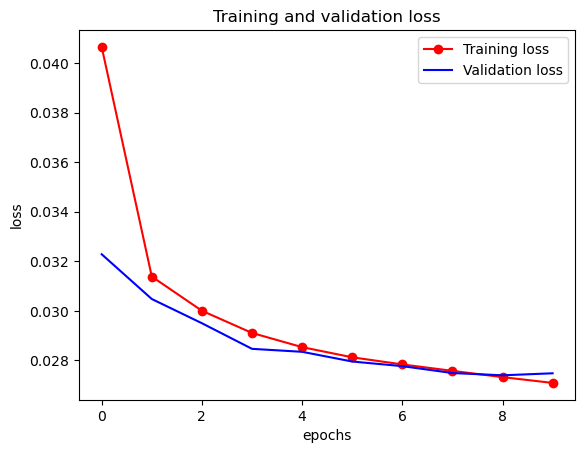

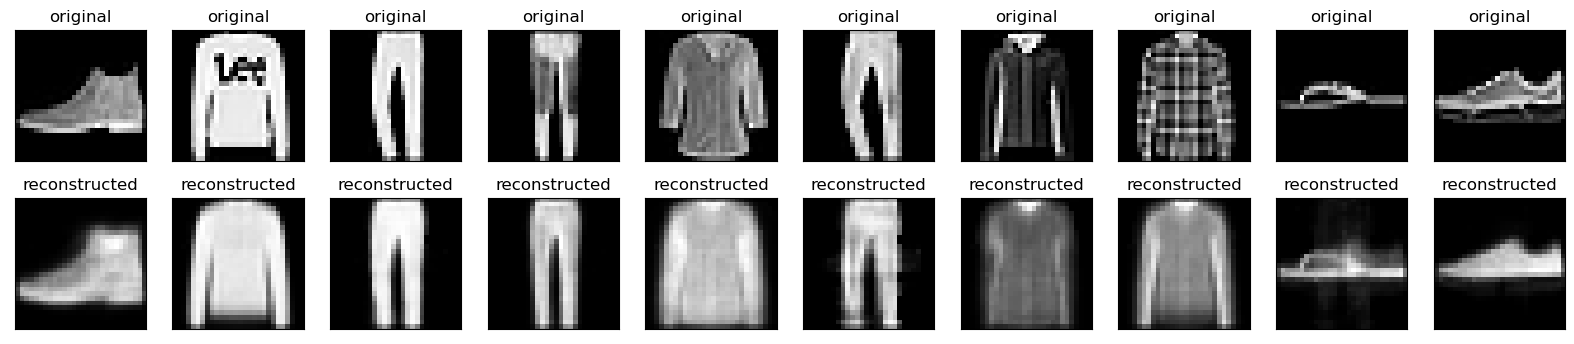

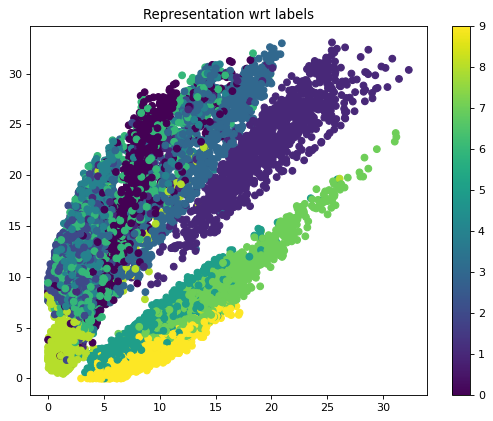

(1, 2)
1/1 [==============================] - 0s 59ms/step
(1, 2)
1/1 [==============================] - 0s 19ms/step
(1, 2)
1/1 [==============================] - 0s 19ms/step
(1, 2)
1/1 [==============================] - 0s 19ms/step
(1, 2)
1/1 [==============================] - 0s 24ms/step
(1, 2)
1/1 [==============================] - 0s 19ms/step
(1, 2)
1/1 [==============================] - 0s 23ms/step
(1, 2)
1/1 [==============================] - 0s 19ms/step
(1, 2)
1/1 [==============================] - 0s 21ms/step
(1, 2)
1/1 [==============================] - 0s 19ms/step
(1, 2)
1/1 [==============================] - 0s 19ms/step
(1, 2)
1/1 [==============================] - 0s 20ms/step
(1, 2)
1/1 [==============================] - 0s 20ms/step
(1, 2)
1/1 [==============================] - 0s 22ms/step
(1, 2)
1/1 [==============================] - 0s 20ms/step
(1, 2)
1/1 [==============================] - 0s 22ms/step
(1, 2)
1/1 [==============================] - 0s 21ms/st

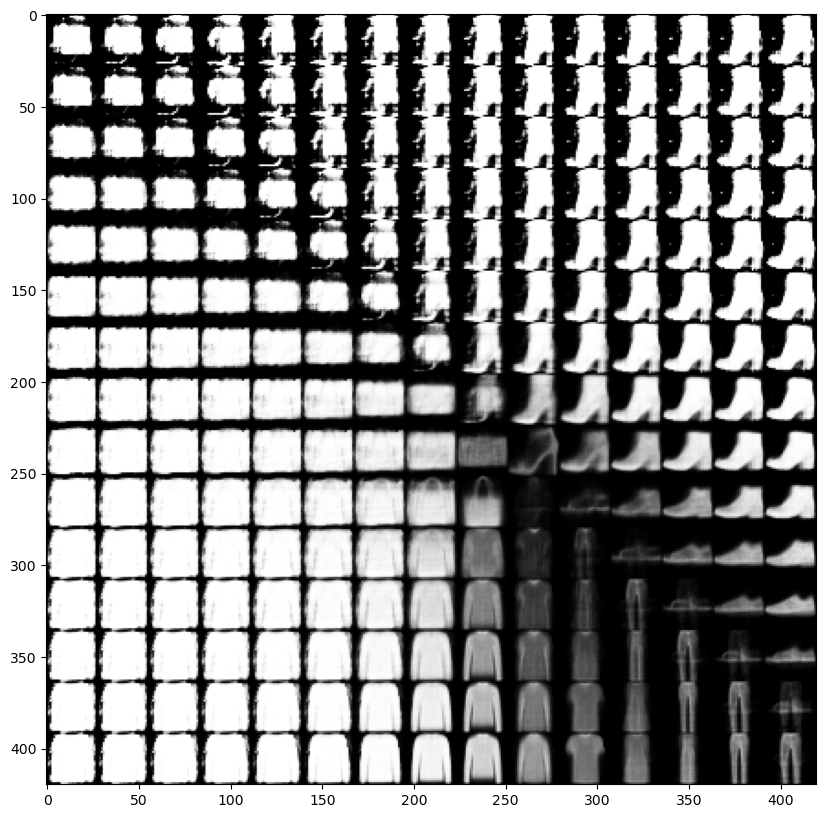

In [57]:
# Create the model 
latent_dim = 2
autoencoder = Autoencoder(latent_dim)

# Set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(),  metrics=['mse', 'mae'])

epochs = 10
history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test))

autoencoder.summary()

plot_loss(history)

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plot_examples(x_test,decoded_imgs)

if latent_dim==2:
  plot_latent_space(encoded_imgs, y_test)
else:
  plot_pca_latent_space(encoded_imgs, y_test)

if latent_dim==2:
  plot_manifold(autoencoder.decoder)

### Observations on latent_dim = 2: 

In this case **latent_dim** was set to 2. In this case we get a smaller total number of parameters for the network respect to the previous case. 

Since the latent_dim is decreased, the training loss and validation loss increase. This is because reducing the latent_dim reduces the capacity of the autoencoder to learn a compressed representation of the input data. So the bottleneck layer will have fewer neurons, which means that the model will be forced to discard more information about the input during encoding. This can result in a less accurate reconstruction of the input during decoding, leading to a higher reconstruction loss, in fact, the reconstructed images are less precise and have less visible details. 

### latent_dim = 100

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.0251 - mse: 0.0251 - mae: 0.0921 - val_loss: 0.0174 - val_mse: 0.0174 - val_mae: 0.0738
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0155 - mse: 0.0155 - mae: 0.0688 - val_loss: 0.0145 - val_mse: 0.0145 - val_mae: 0.0662
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0136 - mse: 0.0136 - mae: 0.0636 - val_loss: 0.0129 - val_mse: 0.0129 - val_mae: 0.0618
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0606 - val_loss: 0.0124 - val_mse: 0.0124 - val_mae: 0.0603
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - mse: 0.0119 - mae: 0.0587 - val_loss: 0.0121 - val_mse: 0.0121 - val_mae: 0.0595
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0115 - mse: 0.0115 - mae: 0.0573 - val_loss: 0.0114 - val_mse: 0.0114 - val_mae: 0.0569
Epoc

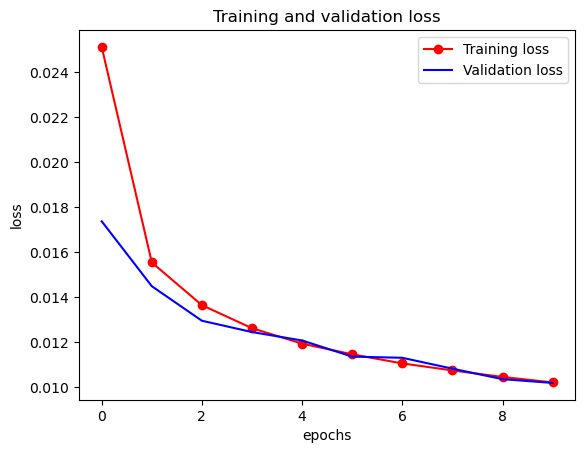

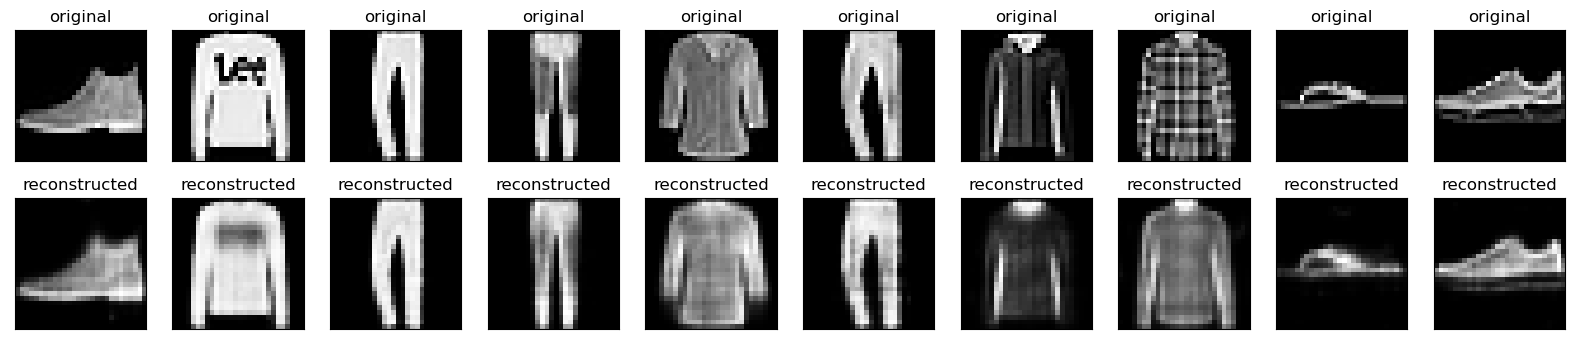

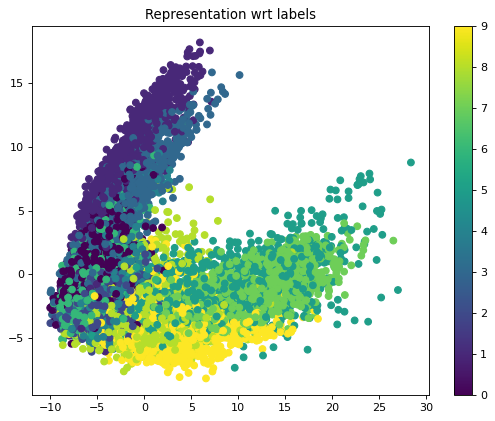

In [59]:
# Create the model 
latent_dim = 100
autoencoder = Autoencoder(latent_dim)

# Set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(),  metrics=['mse', 'mae'])

epochs = 10
history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test))

autoencoder.summary()

plot_loss(history)

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plot_examples(x_test,decoded_imgs)

if latent_dim==2:
  plot_latent_space(encoded_imgs, y_test)
else:
  plot_pca_latent_space(encoded_imgs, y_test)

if latent_dim==2:
  plot_manifold(autoencoder.decoder)

### Observations on latent_dim = 100:

In this case I increase the latent_dim to 100. The training loss and validation loss decrease, as the autoencoder is given more capacity to learn a compressed representation of the input data. However, in general if we increase latent_dim beyond a certain point, the autoencoder may start to overfit the training data, and the validation loss may start to increase. This is because the larger bottleneck layer may start to memorize the training data instead of learning generalizable features.

In this case the increase in latent_dim does not lead to overfitting, the reconstructed images are better and more detailed respect to the two previous cases, as the autoencoder is able to learn a more detailed and accurate compressed representation of the input data.

## Try to modify the Model

In [75]:
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   

    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(784, activation='sigmoid'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0271 - mse: 0.0271 - mae: 0.0966 - val_loss: 0.0195 - val_mse: 0.0195 - val_mae: 0.0785
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.0750 - val_loss: 0.0177 - val_mse: 0.0177 - val_mae: 0.0734
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0169 - mse: 0.0169 - mae: 0.0707 - val_loss: 0.0167 - val_mse: 0.0167 - val_mae: 0.0704
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0162 - mse: 0.0162 - mae: 0.0683 - val_loss: 0.0160 - val_mse: 0.0160 - val_mae: 0.0674
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.0669 - val_loss: 0.0157 - val_mse: 0.0157 - val_mae: 0.0671
Model: "autoencoder_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequenti

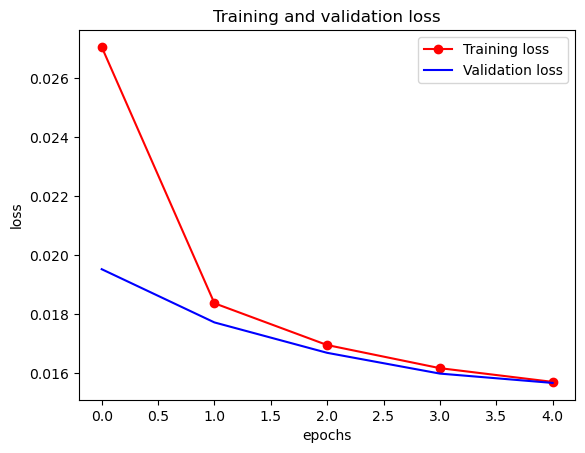

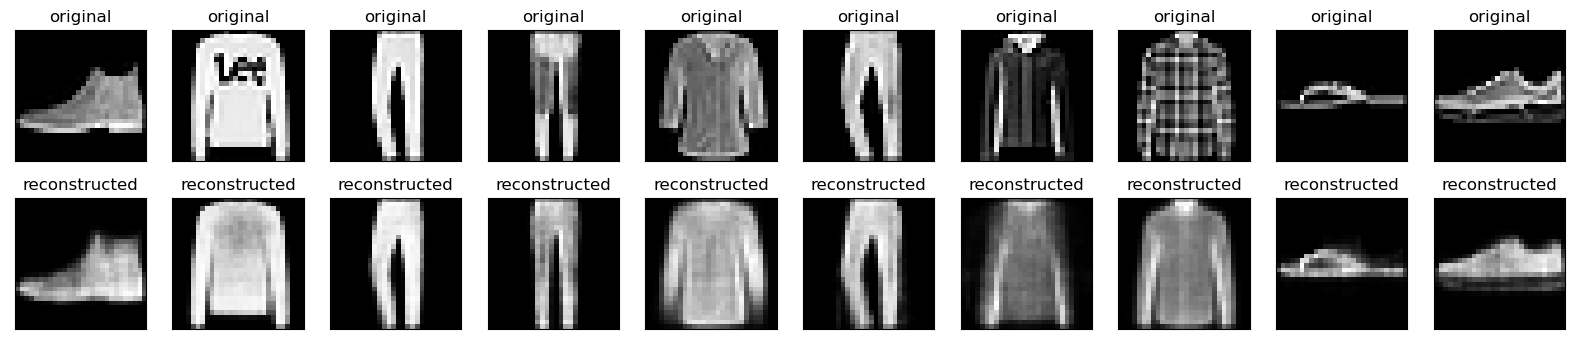

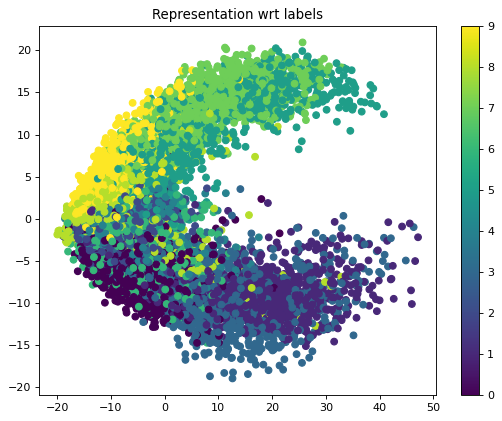

In [76]:
# Create the model 
latent_dim = 10
autoencoder = Autoencoder(latent_dim)

# Set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(),  metrics=['mse', 'mae'])

epochs = 5
history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test))

autoencoder.summary()

plot_loss(history)

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plot_examples(x_test,decoded_imgs)

if latent_dim==2:
  plot_latent_space(encoded_imgs, y_test)
else:
  plot_pca_latent_space(encoded_imgs, y_test)

### Observation on the new model:

The Encoder and Decoder should be as symmetric as possible, so I tried to add a dense layer in the encoder in order to get more symmetry in the structure of the model. The result does not improve, I think that this is due to the fact that with the first model the result was already good, especially in the case with latent_dim = 100. So adding a new layer, I think that leads to overfitting, where the model becomes too specialized to the training data and does not generalize well to new data.

## Load data mnist dataset

In [107]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


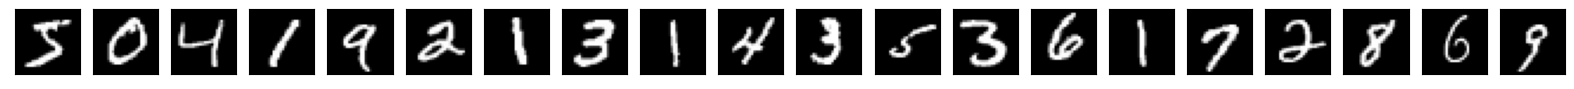

In [108]:
# Normalize and reshape the data
x_train = preprocess(x_train)
x_test = preprocess(x_test)

plot_imgs(x_train)

In [109]:
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   


    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      # layers.Dense(784, activation='sigmoid'),
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(latent_dim, activation='relu'),
    ])

    
    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0360 - mse: 0.0360 - mae: 0.0867 - val_loss: 0.0252 - val_mse: 0.0252 - val_mae: 0.0658
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0234 - mse: 0.0234 - mae: 0.0617 - val_loss: 0.0215 - val_mse: 0.0215 - val_mae: 0.0575
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0211 - mse: 0.0211 - mae: 0.0566 - val_loss: 0.0203 - val_mse: 0.0203 - val_mae: 0.0551
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.0541 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.0526
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0191 - mse: 0.0191 - mae: 0.0525 - val_loss: 0.0186 - val_mse: 0.0186 - val_mae: 0.0512
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0186 - mse: 0.0186 - mae: 0.0513 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.0505
Epoc

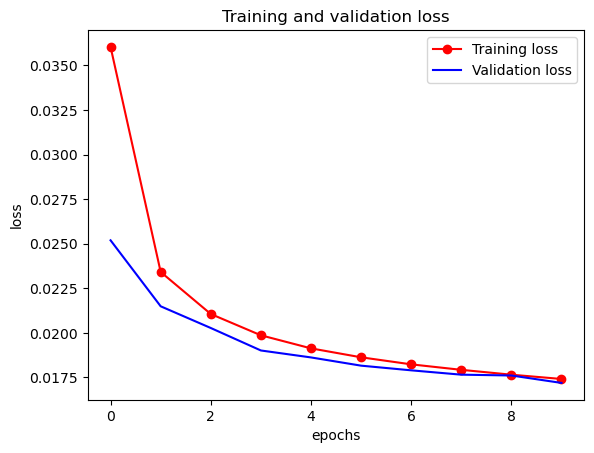

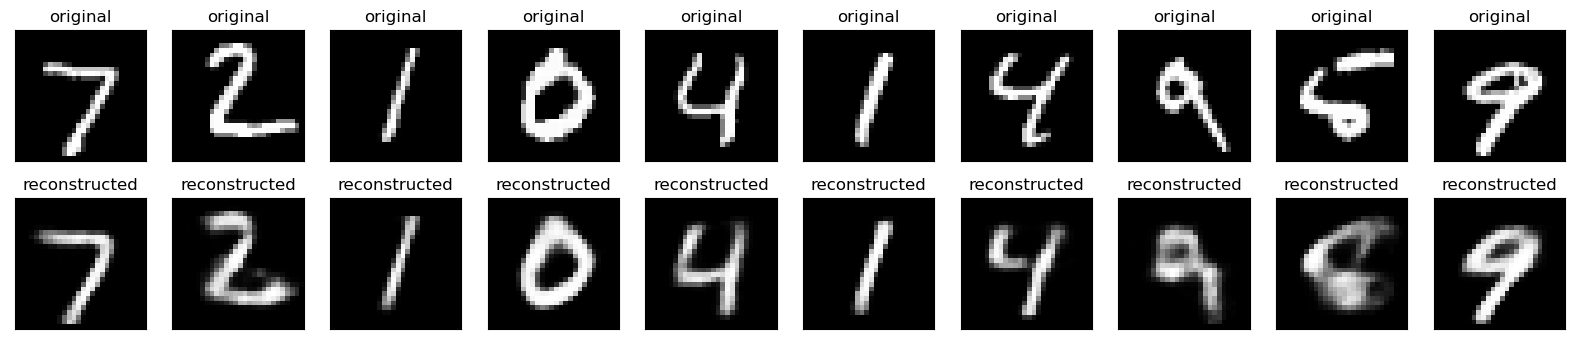

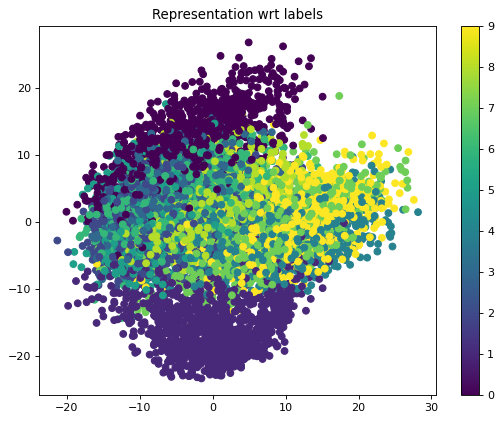

In [110]:
# Create the model 
latent_dim = 10
autoencoder = Autoencoder(latent_dim)

# Set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError(),  metrics=['mse', 'mae'])

epochs = 10
history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test))


autoencoder.summary()

plot_loss(history)

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plot_examples(x_test,decoded_imgs)

if latent_dim==2:
  plot_latent_space(encoded_imgs, y_test)
else:
  plot_pca_latent_space(encoded_imgs, y_test)

## Define Autoencoder with Convolutional layers

we are going to create a convolutional model in Keras. 
Usually a convolutional model is made by two subsequent part:
* A convolutional part
* A fully connected

We can show an example of the general structure in the next picture:

![Convolutional autoencoder](https://149695847.v2.pressablecdn.com/wp-content/uploads/2020/07/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png)



Usually the convolutional part is made by some layers composed by
* convolutional layer: performs a spatial convolution over images
* pooling layer: used to reduce the output spatial dimension from $n$ to 1 by averaging the $n$ different value or considering the maximum between them 
* dropout layer: applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.



Implement a Model as you have done for the deep autoencoder. Here try to use Convolutions, Batch Normalizations and Pooling layers.

The Decoder should be specular to the Encoder, therefore the Convolutional layers should be replaced with [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose)

###  Model as in the image above

In [88]:
class ConvAutoencoder(Model):
  def __init__(self, latent_dim):
    super(ConvAutoencoder, self).__init__()
    self.latent_dim = latent_dim   

    # Encoder
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
    ])
    
    self.encoder.add(layers.BatchNormalization())
    print(self.encoder.output_shape)
    self.encoder.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
    self.encoder.add(layers.BatchNormalization())
    print(self.encoder.output_shape)
    self.encoder.add(layers.Conv2D(128, (3, 3), activation='relu', strides=2))
    self.encoder.add(layers.BatchNormalization())
    print(self.encoder.output_shape)
    self.encoder.add(layers.Flatten())
    print(self.encoder.output_shape)
    self.encoder.add(layers.Dense(latent_dim, activation='relu'))
    print(self.encoder.output_shape)

    # Decoder
    self.decoder = tf.keras.Sequential([
      layers.Dense(units = 3 * 3 * 128, activation="relu"),
      layers.Reshape(target_shape=(3, 3, 128)),
      layers.Conv2DTranspose(filters=64, kernel_size=3, strides=(2, 2),  activation="relu"),
      layers.Conv2DTranspose(filters=32, kernel_size=3, strides=(2, 2), padding='same', activation="relu"),
      layers.Conv2DTranspose(filters=1, kernel_size=3, strides=(2, 2), padding='same', activation="relu"),
        
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

(None, 14, 14, 32)
(None, 7, 7, 64)
(None, 3, 3, 128)
(None, 1152)
(None, 64)
Epoch 1/5
1875/1875 [==============================] - 32s 16ms/step - loss: 0.0163 - val_loss: 0.0101
Epoch 2/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 3/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 4/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0071 - val_loss: 0.0069
Model: "conv_autoencoder_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_68 (Sequential)  (None, 64)                167360    
                                                                 
 sequential_69 (Sequential)  (None, 28, 28, 1)         167425    
                                                

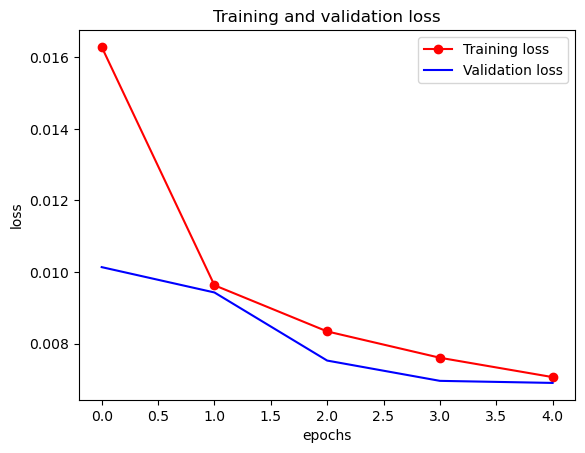

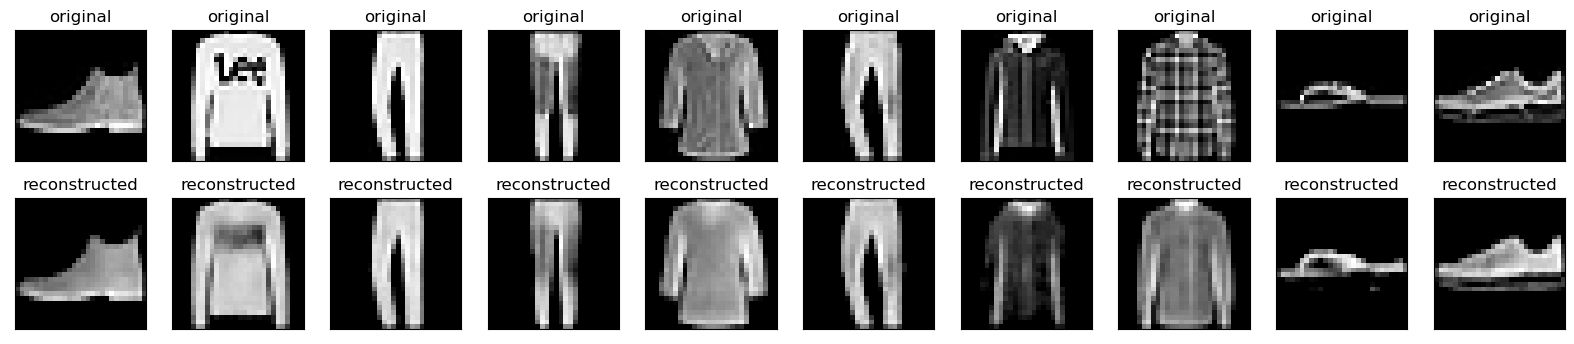

In [89]:
latent_dim = 64
autoencoder = ConvAutoencoder(latent_dim)

#  set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


epochs = 5
history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

autoencoder.summary()
plot_loss(history)
plot_examples(x_test, decoded_imgs)

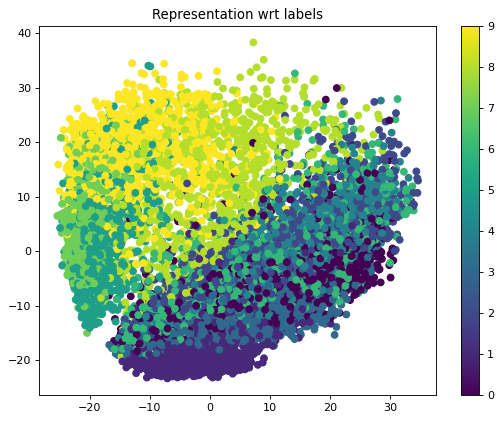

In [90]:
if latent_dim==2:
  plot_latent_space(encoded_imgs, y_test)
else:
  plot_pca_latent_space(encoded_imgs, y_test)

if latent_dim==2:
  plot_manifold(autoencoder.decoder)

## Try to modify the Autoencoder

### First test: observations
Here I tried to add two Convolutional Layers in the encoder and two Traspose Convolutional Layers in the decoder in order to make the model symmetric. The result is really good, both the training and the validation errors are very small, almost zero. In this case, the total number of parameters of the Convolutional Network is way smaller respect to the Dense Network implementation but the training time needed to complete each epoch is bigger. The reconstructed images are very precise and detailed and in general the result is better respect to the Dense Network.

In [93]:
class ConvAutoencoder(Model):
  def __init__(self, latent_dim):
    super(ConvAutoencoder, self).__init__()
    self.latent_dim = latent_dim   

    # Encoder
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
    ])

    # Decoder
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [94]:
latent_dim = 64
autoencoder = ConvAutoencoder(latent_dim)

#  set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


epochs = 5
history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

autoencoder.summary()

Epoch 1/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0150 - val_loss: 0.0065
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0054 - val_loss: 0.0048
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0034 - val_loss: 0.0033
Model: "conv_autoencoder_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_74 (Sequential)  (None, 7, 7, 8)           1320      
                                                                 
 sequential_75 (Sequential)  (None, 28, 28, 1)         1897      
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainable pa

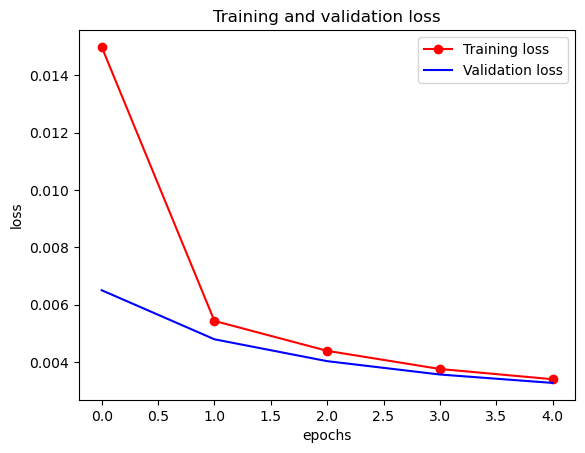

In [95]:
plot_loss(history)

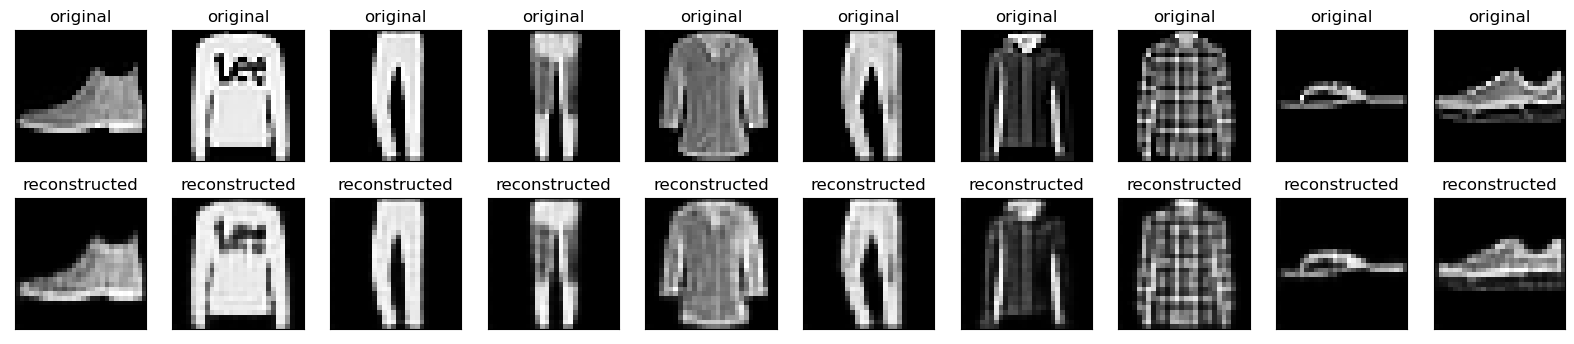

In [96]:
plot_examples(x_test, decoded_imgs)

Do you see any difference between the Deep Autoencoder and the Convolutional one? Training time, Reconstruction loss, Complexity of the model (e.g. number of parameters).

### Second Test with Pooling layers
Here I tried to add some MaxPooling layers. In general this type of layers are used to downsample the feature maps produced by the convolutional layers. This reduces the spatial dimensions in order to capture the most important and relevant features in the images. 

In this case the MaxPooling layers are applied with a 2x2 pooling size which means that the feature maps are reduced to half their original size. I can't notice a particular improvement in the result, it is slightly worse than the first test. 

In [36]:
class ConvAutoencoder(Model):
    def __init__(self, latent_dim):
        super(ConvAutoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(latent_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(7*7*16, activation='relu'),
            tf.keras.layers.Reshape((7, 7, 16)),
            tf.keras.layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.UpSampling2D((2, 2)),
            tf.keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.UpSampling2D((2, 2)),
            tf.keras.layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')
        ])

    @tf.function
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Epoch 1/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0197 - val_loss: 0.0131
Epoch 2/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 3/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 5/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0090 - val_loss: 0.0090
Model: "conv_autoencoder_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 64)                55184     
                                                                 
 sequential_15 (Sequential)  (None, 28, 28, 1)         58209     
                                                                 
Total params: 113,393
Trainable params: 113,393
Non-trainable

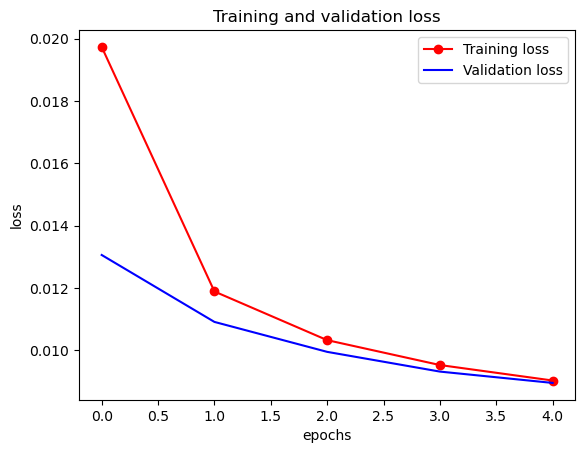

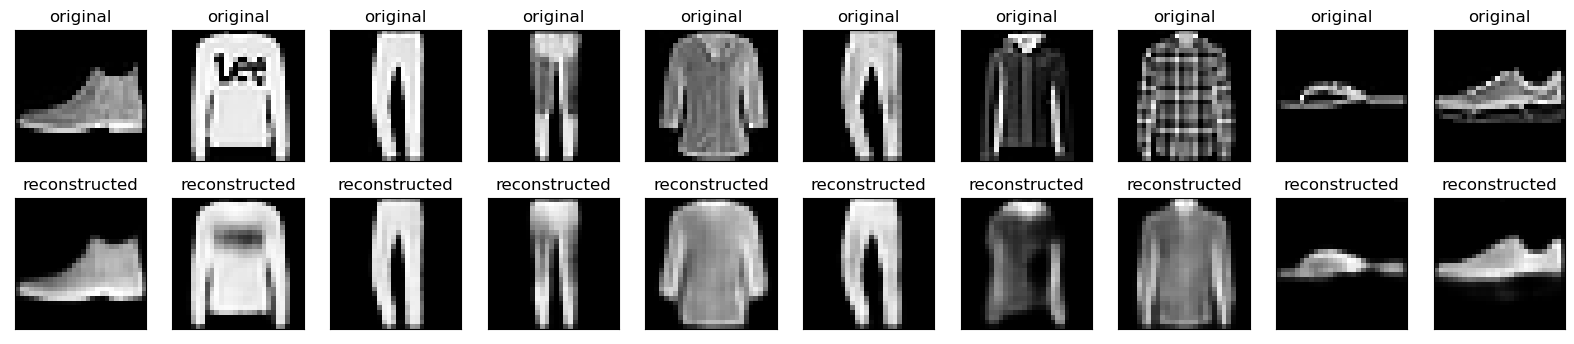

In [37]:
latent_dim = 64
autoencoder = ConvAutoencoder(latent_dim)

#  set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


epochs = 5
history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

autoencoder.summary()
plot_loss(history)
plot_examples(x_test, decoded_imgs)

### Third Test with Dropout layers
Here I tried to add some Dropout layers. In general this type of layers are used to prevent overfitting which occurs when a model learns to fit the training data too well and fails to generalize on new and unseed data (test), this can happen for example when the model is too complex and has too many parameters. In order to solve this problem we can use the Dropout layers, they randomly drop out a fraction of the input units to a layer during the training. This forces the network to learn more robust features that are useful for predicting the output, even if some of the input units are missing. 

In this case I can notice that the application of this type of layers leads to a bigger difference between training loss and test loss, the first one is bigger than the second because Dropout randomly sets some input units to zero during training, which effectively reduces the capacity of the network and makes it harder to fit the training data. I also can notice that the computational time in this case is higher than the previous cases because the model needs more iterations to converge. 

In [19]:
class ConvAutoencoder(Model):
  def __init__(self, latent_dim):
    super(ConvAutoencoder, self).__init__()
    self.latent_dim = latent_dim   

    # Encoder
    self.encoder = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation="relu"),
        layers.Dropout(0.25),
        layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation="relu"),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(latent_dim, activation='relu')
    ])

    # Decoder
    self.decoder = tf.keras.Sequential([
        layers.Dense(units = 7 * 7 * 64, activation="relu"),
        layers.Reshape(target_shape=(7, 7, 64)),
        layers.Conv2DTranspose(filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"),
        layers.Dropout(0.25),
        layers.Conv2DTranspose(filters=32, kernel_size=3, strides=(2, 2), padding="SAME", activation="relu"),
        layers.Dropout(0.25),
        layers.Conv2DTranspose(filters=1, kernel_size=3, strides=(1, 1), padding="SAME", activation="sigmoid"),

    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


Epoch 1/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0200 - val_loss: 0.0114
Epoch 2/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0116 - val_loss: 0.0092
Epoch 3/5
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0101 - val_loss: 0.0082
Epoch 4/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0095 - val_loss: 0.0077
Epoch 5/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0091 - val_loss: 0.0074
Model: "conv_autoencoder_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 64)                166336    
                                                                 
 sequential_3 (Sequential)   (None, 28, 28, 1)         259521    
                                                                 
Total params: 425,857
Trainable params: 425,857
Non-trai

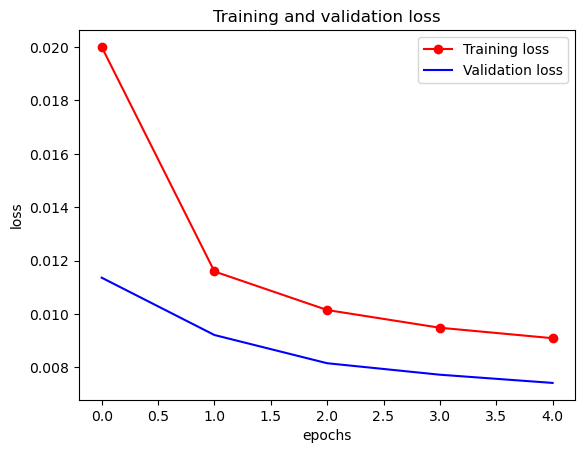

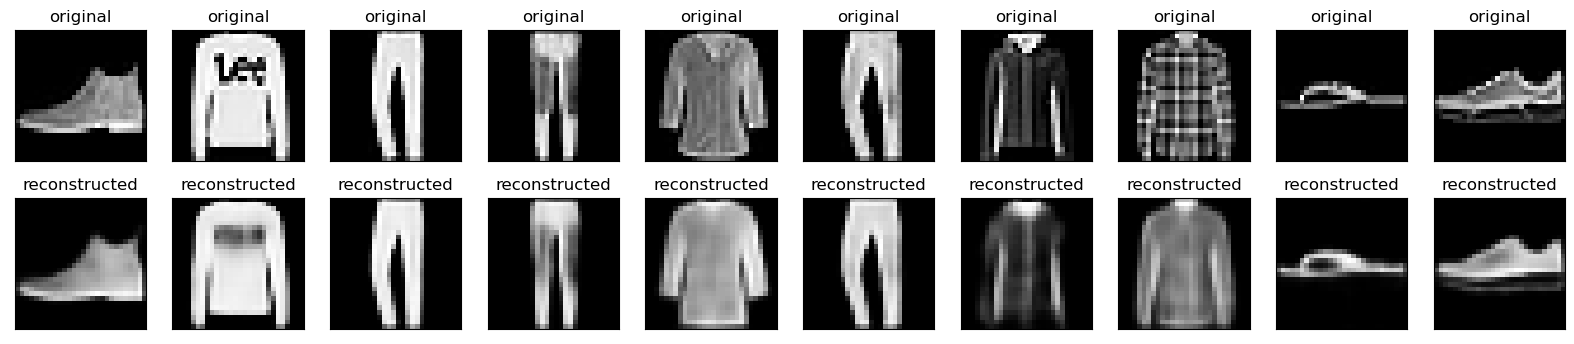

In [20]:
latent_dim = 64
autoencoder = ConvAutoencoder(latent_dim)

#  set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


epochs = 5
history = autoencoder.fit(x_train, x_train,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

autoencoder.summary()
plot_loss(history)
plot_examples(x_test, decoded_imgs)

### Observations:
In general we can notice that the Autoencoder implemented with Convolutional layers are better respect to the Autoencoder implemented with the Dense layers, this is due to the fact that Convolutional layers are designed to take advantage of the spatial structure of the images. They use fewer parameters by forcing input values to share parameters. This can result in better performance when working with image data. In fact, even if in terms of time the Convolutional Autoencoder is slower, both the Training and the Test errors are a lot smaller respect to the Dense Autoencoder. 

## Denoising (optional)

Let's put our convolutional autoencoder to work on an image denoising problem. It's simple: we will train the autoencoder to map noisy images to clean images.

Here's how we will generate synthetic noisy images: we just apply a gaussian noise matrix and clip the images between 0 and 1.



In [38]:
def add_noise(img, noise_factor ):
  # add gaussian noise
  img_noisy = img + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=img.shape) 
  img_noisy = np.clip(img_noisy, 0., 1.)
  return img_noisy

In [39]:
class ConvAutoencoder(Model):
  def __init__(self, latent_dim):
    super(ConvAutoencoder, self).__init__()
    self.latent_dim = latent_dim   

    # Encoder
    self.encoder = tf.keras.Sequential([
        layers.InputLayer(input_shape=(28, 28, 1)),
        layers.Conv2D(filters=16, kernel_size=3, strides=(2,2), padding='same', activation="relu"),
        layers.Conv2D(filters=8, kernel_size=3, strides=(2,2), padding='same', activation="relu"),
        layers.Conv2D(filters=8, kernel_size=1, strides=(1,1), padding='same', activation="relu")
    ])

    # Decoder
    self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(filters=8, kernel_size=3, strides=(2, 2), padding="same", activation="relu"),
        layers.Conv2DTranspose(filters=1, kernel_size=3, strides=(2, 2), padding="same", activation="sigmoid"),

    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

### noise = 0.5

In [40]:
x_train_noisy = add_noise(x_train, 0.5)
x_test_noisy = add_noise(x_test, 0.5)

In [41]:
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


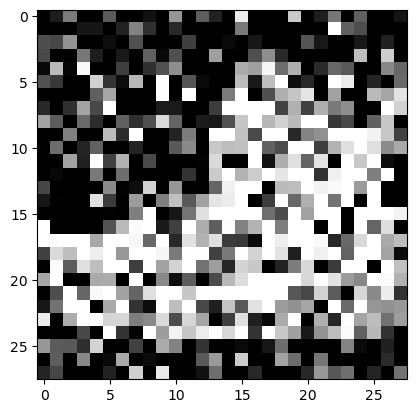

In [42]:
plt.imshow(x_train_noisy[0], cmap='gray')
plt.show()

In [43]:
latent_dim = 64 
autoencoder = ConvAutoencoder(latent_dim)

#  set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.BinaryCrossentropy())

epochs = 10
autoencoder.fit(x_train_noisy, x_train_noisy,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test_noisy,x_test_noisy)
               )

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4915 - val_loss: 0.4535
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4369 - val_loss: 0.4324
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4306 - val_loss: 0.4302
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4292 - val_loss: 0.4293
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4285 - val_loss: 0.4287
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4280 - val_loss: 0.4285
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4277 - val_loss: 0.4281
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4272 - val_loss: 0.4274
Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4264 - val_loss: 0.4265
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - l

Model: "conv_autoencoder_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_18 (Sequential)  (None, 7, 7, 8)           1392      
                                                                 
 sequential_19 (Sequential)  (None, 28, 28, 1)         657       
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


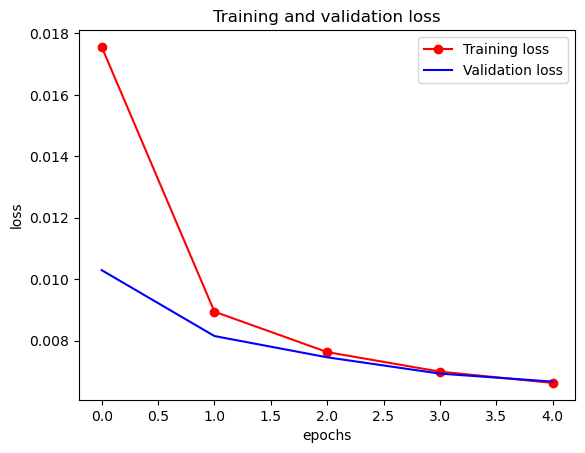

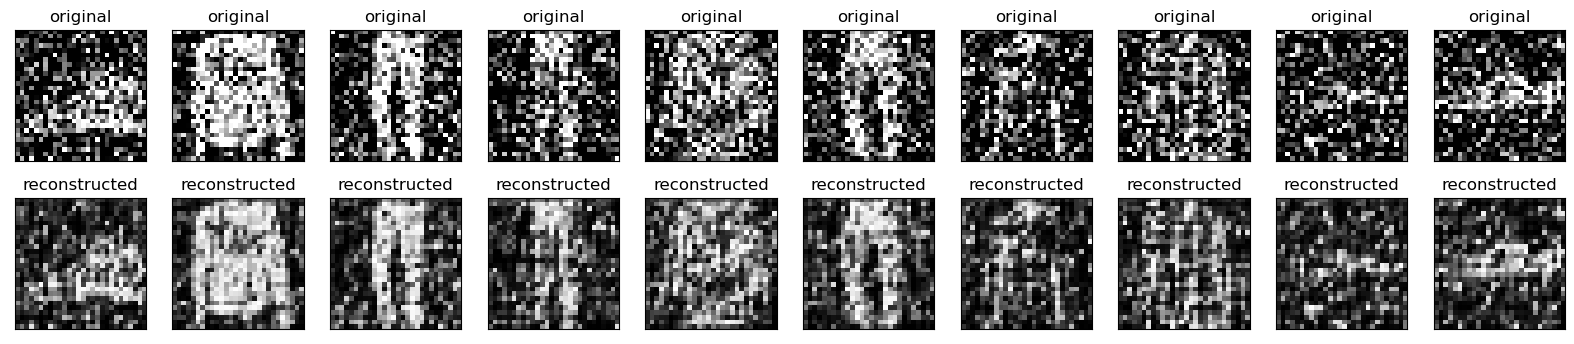

In [45]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

autoencoder.summary()
plot_loss(history)
plot_examples(x_test_noisy, decoded_imgs)

### noise = 0.1

In [46]:
x_train_noisy = add_noise(x_train, 0.1)
x_test_noisy = add_noise(x_test, 0.1)

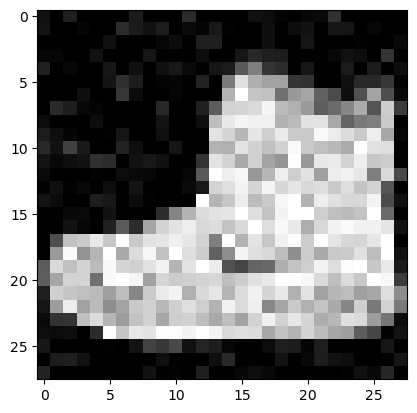

In [47]:
plt.imshow(x_train_noisy[0], cmap='gray')
plt.show()

In [36]:
latent_dim = 64 
autoencoder = ConvAutoencoder(latent_dim)

#  set optimizer and loss function
autoencoder.compile(optimizer='adam', loss=losses.BinaryCrossentropy())

epochs = 10
autoencoder.fit(x_train_noisy, x_train_noisy,
                epochs=epochs,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy)
               )

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3770 - val_loss: 0.3485
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3422 - val_loss: 0.3410
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3383 - val_loss: 0.3391
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3366 - val_loss: 0.3374
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3352 - val_loss: 0.3365
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3345 - val_loss: 0.3360
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3339 - val_loss: 0.3340
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3317 - val_loss: 0.3330
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3311 - val_loss: 0.3325
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

Model: "conv_autoencoder_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 7, 7, 8)           1392      
                                                                 
 sequential_17 (Sequential)  (None, 28, 28, 1)         657       
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


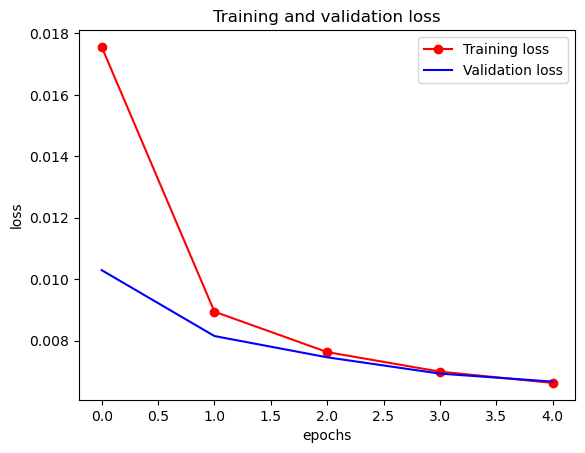

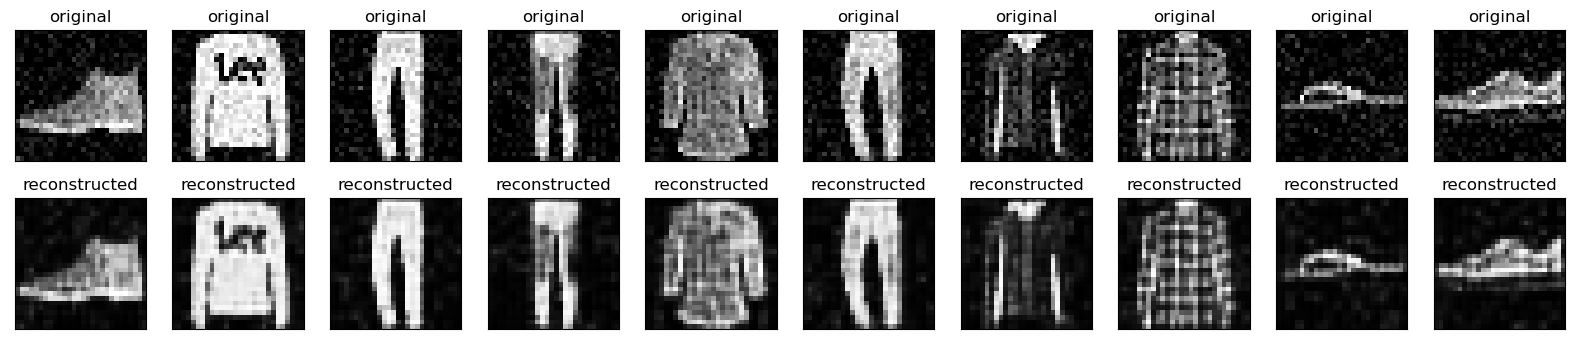

In [37]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

autoencoder.summary()
plot_loss(history)
plot_examples(x_test_noisy, decoded_imgs)